In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn import set_config
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel

house_regess = pd.read_csv(r"your_path_here/housing_iteration_6_regression.csv")

pd.set_option('display.max_columns', None)

house_regess.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Numerical Data: 
These are columns with quantitative values that can be measured or counted.
Id: Identifier (Integer)

MSSubClass: Identifies the type of dwelling involved in the sale (Integer)

LotFrontage: Linear feet of street connected to property (Float)

LotArea: Lot size in square feet (Integer)

OverallQual, OverallCond: Rates the overall material and finish of the house, and its overall condition respectively (Likely present in the dataset but not shown in the snippet)

YearBuilt, YearRemodAdd: Original construction date and remodel date (Likely present, Integer)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF: Type 1 and 2 finished square feet, and unfinished square feet of basement area (Likely present, Integer)

TotalBsmtSF: Total square feet of basement area (Likely present, Integer)

1stFlrSF, 2ndFlrSF: First and second floor square feet (Likely present, Integer)

GrLivArea: Above grade (ground) living area square feet (Likely present, Integer)

FullBath, HalfBath: Full and half bathrooms above grade (Likely present, Integer)

BedroomAbvGr, KitchenAbvGr: Bedrooms and kitchens above grade (Likely present, Integer)

TotRmsAbvGrd: Total rooms above grade (excluding bathrooms) (Likely present, Integer)

Fireplaces: Number of fireplaces (Integer)

GarageCars, GarageArea: Size of garage in car capacity and square feet (Likely present, Integer)

WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch: Square feet of wood deck, open porch, enclosed porch, three-season porch, and screen porch (Likely present, Integer)

Pool area in square feet (Integer)

MiscVal: $Value of miscellaneous feature (Integer)

MoSold, YrSold: Month and Year sold (Integer)

SalePrice: Sale price (Integer)

## Categorical Data: 

These columns contain qualitative values representing types or categories.

MSZoning: Identifies the general zoning classification of the sale (String)

Street: Type of road access to property (String)

Alley: Type of alley access to property (String, NaN indicates no alley access)

LotShape: General shape of property (String)

LandContour: Flatness of the property (String)

Utilities: Type of utilities available (String)

SaleType: Type of sale (String)

SaleCondition: Condition of sale (String)

And other categorical columns likely present but not shown in the snippet that would include variables like RoofStyle, Exterior1st, Heating, etc., describing aspects of the house and sale conditions.

## Ordinal Data: 

While technically a sub-type of categorical data, these columns have a meaningful order or ranking but are not necessarily linearly spaced.
Not explicitly listed in the snippet, but columns like OverallQual, OverallCond, and others that rate qualities on a scale fall into this category.

## Missing Values: 

Columns like Alley, PoolQC, Fence, MiscFeature, and potentially others contain NaN values indicating missing information, which is common in real-world datasets.

## X and Y Creation & Data Splitting

In [2]:
# X and y creation
x = house_regess
y = x.pop("SalePrice")

# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [3]:
house_regess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# drop ID
house_regess = house_regess.drop(['Id'],axis=1)
house_regess.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [5]:
house_regess.shape

(1460, 79)

## Dealing with missing values and duplicates

In [6]:
# Checking for missing values in x_train
missing_values_x_train = x_train.isnull().sum()

# Filter only columns with missing values
missing_columns_x_train = missing_values_x_train[missing_values_x_train > 0]

# Checking for duplicated rows in x_train
duplicated_rows_x_train = x_train.duplicated().sum()

print("Missing Values in x_train:\n", missing_columns_x_train)
print("\nDuplicated Rows in x_train:", duplicated_rows_x_train)

Missing Values in x_train:
 LotFrontage      189
Alley           1092
MasVnrType       700
MasVnrArea         4
BsmtQual          29
BsmtCond          29
BsmtExposure      30
BsmtFinType1      29
BsmtFinType2      29
Electrical         1
FireplaceQu      555
GarageType        67
GarageYrBlt       67
GarageFinish      67
GarageQual        67
GarageCond        67
PoolQC          1161
Fence            940
MiscFeature     1125
dtype: int64

Duplicated Rows in x_train: 0


In [7]:
x_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,1168.000000,979.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1164.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1101.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,730.679795,56.849315,69.584270,10353.034247,6.093322,5.583904,1970.898973,1985.007705,103.324742,447.009418,46.425514,567.702911,1061.137842,1168.529110,346.558219,5.809932,1520.897260,0.425514,0.051370,1.569349,0.378425,2.871575,1.049658,6.540240,0.605308,1978.213442,1.759418,469.228596,97.089041,45.742295,21.105308,3.630993,14.263699,3.448630,47.494863,6.292808,2007.858733
std,423.244159,42.462802,23.205003,9411.800862,1.402296,1.129862,30.397482,20.538695,178.429793,465.733256,165.017990,443.230128,448.165770,396.202575,437.129060,48.069696,537.110594,0.523255,0.224692,0.551062,0.502552,0.831439,0.217329,1.646608,0.636673,24.882722,0.745967,212.401638,127.902620,65.675277,60.068228,30.803242,55.068118,44.896939,547.845813,2.688300,1.333020
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,367.750000,20.000000,59.000000,7538.750000,5.000000,5.000000,1953.750000,1967.000000,0.000000,0.000000,0.000000,220.750000,793.000000,879.250000,0.000000,0.000000,1134.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,329.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,724.000000,50.000000,69.000000,9452.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,381.000000,0.000000,480.000000,996.000000,1095.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1098.250000,70.000000,80.000000,11604.000000,7.000000,6.000000,2000.000000,2004.000000,166.250000,713.750000,0.000000,804.500000,1311.750000,1396.000000,728.000000,0.000000,1790.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1170.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,528.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,2.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## Descriptive Statistics and Visualization

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000   979.000000    1168.000000  1168.000000   
mean    730.679795    56.849315    69.584270   10353.034247     6.093322   
std     423.244159    42.462802    23.205003    9411.800862     1.402296   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     367.750000    20.000000    59.000000    7538.750000     5.000000   
50%     724.000000    50.000000    69.000000    9452.500000     6.000000   
75%    1098.250000    70.000000    80.000000   11604.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1164.000000  1168.000000   
mean      5.583904  1970.898973   1985.007705   103.324742   447.009418   
std       1.129862    30.397482     20.538695   178.429793   465.733256   
min       1.000

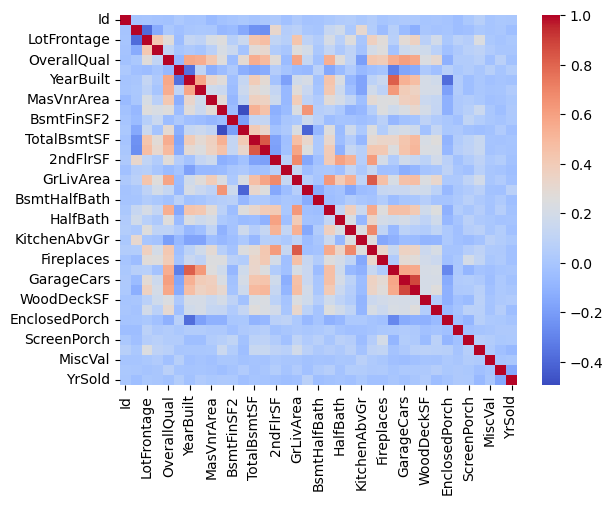

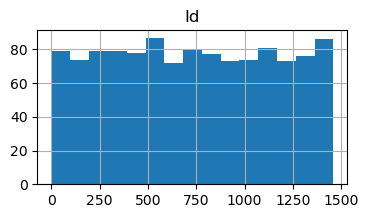

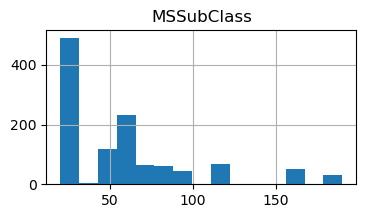

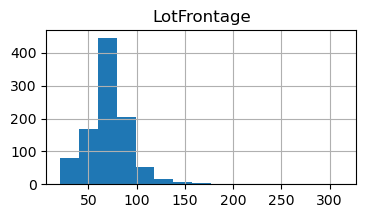

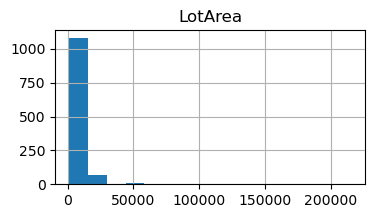

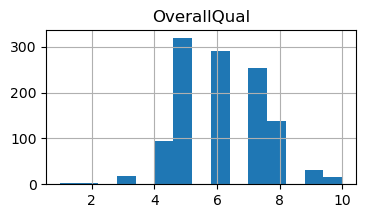

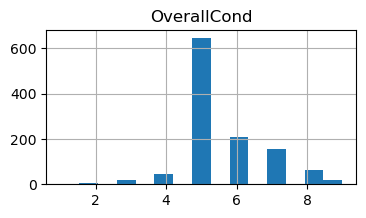

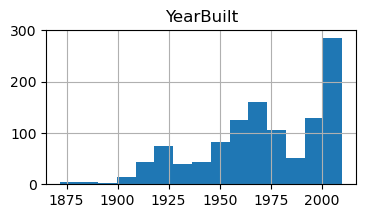

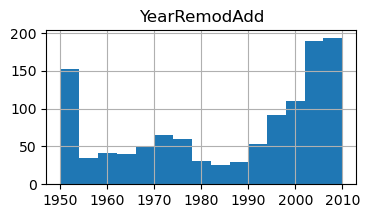

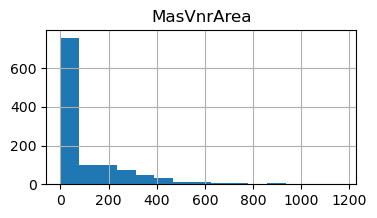

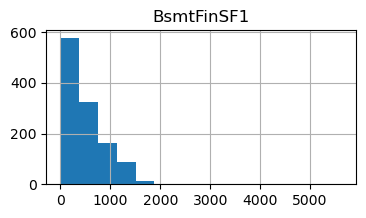

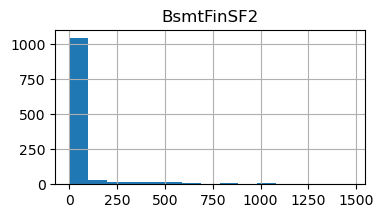

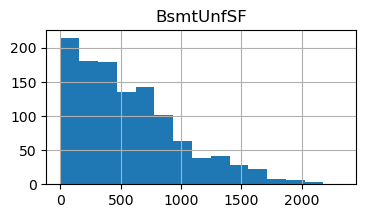

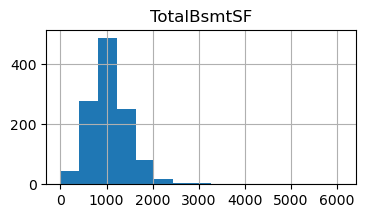

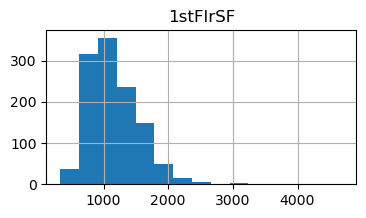

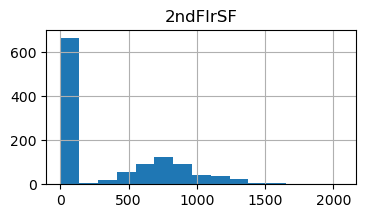

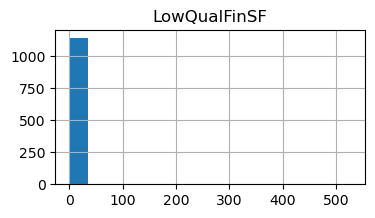

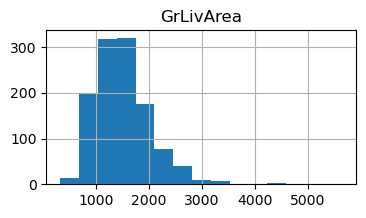

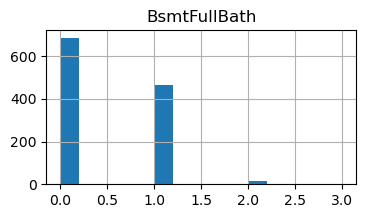

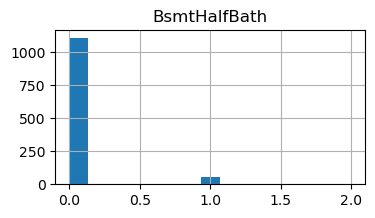

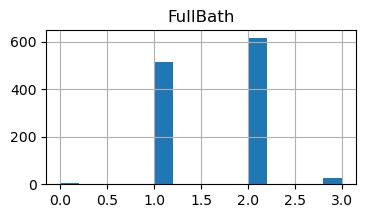

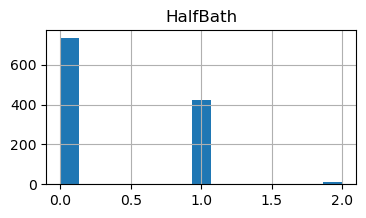

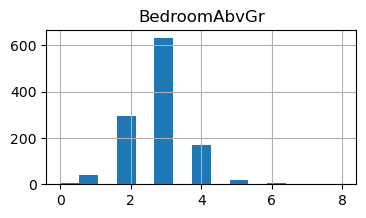

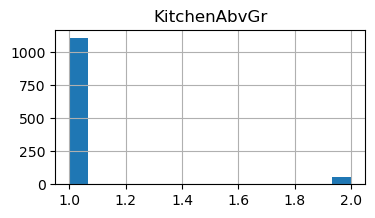

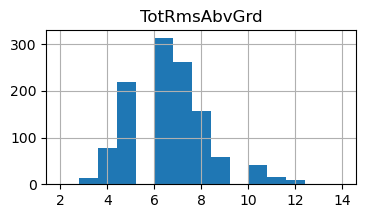

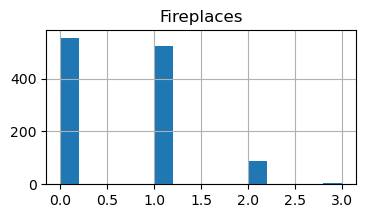

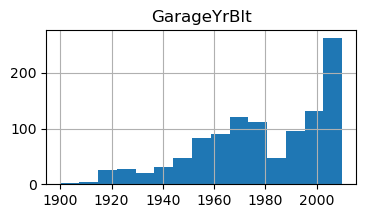

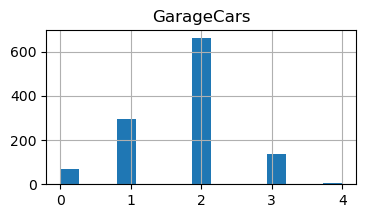

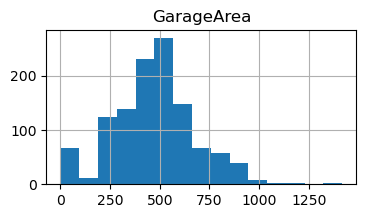

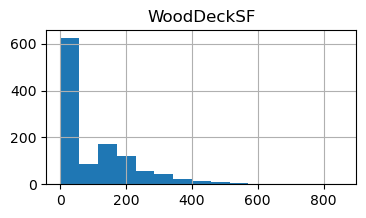

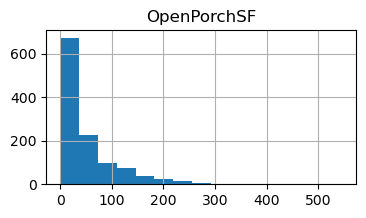

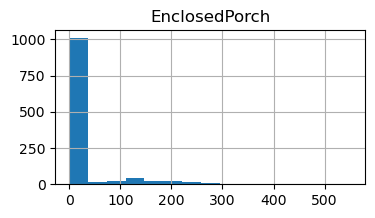

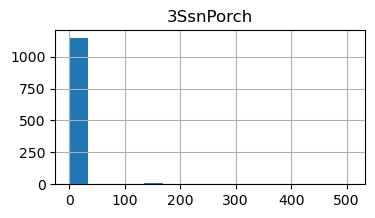

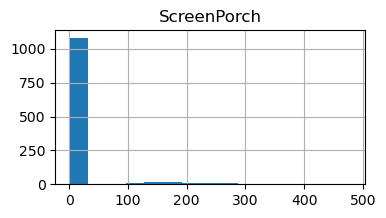

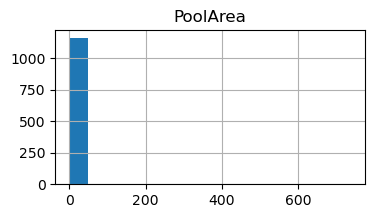

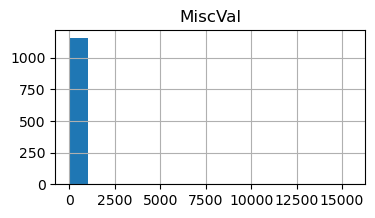

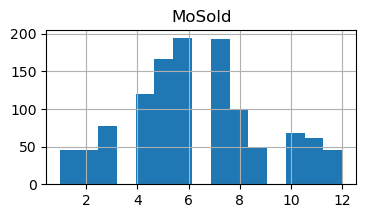

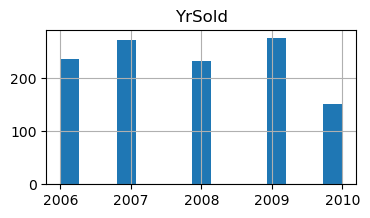

In [8]:
# Descriptive Statistics
print(x_train.describe())  # Numerical features
print(x_train.describe(include=['O']))  # Categorical features

# Correlation Analysis for numerical features
correlation_matrix = x_train.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

# Adjusting Histograms to fit all numerical variables
# Select numerical columns and plot histograms
numerical_columns = x_train.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(4, 2))
    x_train[column].hist(bins=15)
    plt.title(column)
    plt.show()

Numerical Features:

Continuous: LotFrontage, LotArea, and SalePrice are examples of continuous numerical features that represent measurements or counts.
Discrete: MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold are discrete numerical features that indicate quantities.
Categorical Features:

Nominal: MSZoning, Street, Alley, LandContour, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, Functional, GarageType, PavedDrive, MiscFeature, SaleType, SaleCondition represent nominal categorical variables where there is no inherent order.
Binary: Derived from nominal features, indicating presence or absence, such as CentralAir (Y or N).
Ordinal Features:

Features that represent categories with a meaningful order or ranking but are not necessarily equidistant. Examples include LotShape, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC, Fence. These variables often require encoding to convert them into a numerical format for machine learning models to process effectively.

In [9]:
# this needs to be run for each new runtime
# because colab has scikit-learn 1.0.2 pre-installed 
# and we need newer version (1.2.0 and higher)
# to use .set_output() method
!pip install scikit-learn --upgrade

# if you plan on running the whole notebook again during the same runtime
# you can comment the line above

## Pipeline and Pre-process

In [10]:
# select categorical and numerical column names
x_cat_columns = x.select_dtypes(exclude="number").copy().columns
x_num_columns = x.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

# create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)
    
# Creating a ColumnTransformer to apply appropriate transformations to different types of columns
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, x_num_columns), # Transformation for numeric columns
        ("cat_pipe", categoric_pipe, x_cat_columns), # Transformation for categorical columns
    ]
)

### Decision Tree Regressor

In [11]:
# Creating the full pipeline
full_pipeline_tree = make_pipeline(preprocessor, DecisionTreeRegressor())

pipeline_Decisiontreeregression = make_pipeline(preprocessor, 
                              DecisionTreeRegressor()).set_output(transform='pandas')

In [12]:
# Tuning the pipeline to training data
pipeline_Decisiontreeregression.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [13]:
# Pipeline predict
pipeline_Decisiontreeregression.predict(x_train)

array([260000., 181900., 272000., ..., 262500., 133000., 131000.])

In [14]:
# Create the parameter grid for GridSearchCV
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14),
    "decisiontreeregressor__min_samples_leaf": range(3, 10),
    "decisiontreeregressor__criterion": ['friedman_mse', 'squared_error', 'poisson'],
    "decisiontreeregressor__splitter": ["best", "random"]
}

# Create grid search - Define GridSearchCV
search_tree = GridSearchCV(full_pipeline_tree,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

search_tree.fit(x_train, y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'Bs...
                                        DecisionTreeRegressor())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeregressor__criterion': ['friedman_mse',
                                                              'squared_error',
                                                              'poisson'],
                         'decisiontreeregressor__max_depth': range(2, 14),
                         'decisiontreeregressor__min_samples_leaf': range(3, 10),
                         'decisiontreeregressor__splitter': ['best', 'random']},
             verbose=1)

In [15]:
# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(search_tree.best_params_)

Best parameters found by GridSearchCV:
{'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'decisiontreeregressor__criterion': 'poisson', 'decisiontreeregressor__max_depth': 13, 'decisiontreeregressor__min_samples_leaf': 9, 'decisiontreeregressor__splitter': 'best'}


In [16]:
search_tree.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsm...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='poisson', max_depth=13,
                                       min_samples_leaf=9))])

### K-Nearest Neighbors Regressor - KNN

In [17]:
# Creating the full pipeline
full_pipeline_knn = make_pipeline(preprocessor, KNeighborsRegressor())

pipeline_KNeighborsRegressor = make_pipeline(preprocessor, 
                              KNeighborsRegressor()).set_output(transform='pandas')

In [18]:
# Tuning the pipeline to training data
pipeline_KNeighborsRegressor.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [19]:
pipeline_KNeighborsRegressor.predict(x_train)

array([290800. , 173750. , 241356. , ..., 252123.4, 136280. , 130700. ])

In [20]:
# Create parameter grid
param_grid_knn = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],  
    "kneighborsregressor__n_neighbors": range(2, 10), 
    "kneighborsregressor__weights": ['uniform', 'distance'],
    "kneighborsregressor__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create grid search
search_knn = GridSearchCV(full_pipeline_knn,
                          param_grid_knn,
                          cv=5,
                          verbose=1, 
                          error_score='raise')

# Fit 
search_knn.fit(x_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'Bs...
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'kneighborsregressor__algorithm': ['auto', 'ball_tree',
                                                            'kd_tree',
                                                            'brute'],
                         'kneighborsregressor__n_neighbors': range(2, 10),
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             verbose=1)

In [21]:
# Print the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(search_knn.best_params_)

Best parameters found by RandomizedSearchCV:
{'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'kneighborsregressor__algorithm': 'auto', 'kneighborsregressor__n_neighbors': 9, 'kneighborsregressor__weights': 'distance'}


In [22]:
search_knn.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=9, weights='distance'))])

### Support Vector Regression (SVR)

In [23]:
full_pipeline_svr = make_pipeline(preprocessor, SVR())

pipeline_SVR = make_pipeline(preprocessor, SVR()).set_output(transform='pandas')

In [24]:
# Tuning the pipeline to training data
pipeline_SVR.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('svr', SVR())])

In [25]:
pipeline_SVR.predict(x_train)

array([162057.77857324, 161972.44262584, 162026.95115763, ...,
       161984.88647237, 161917.21822641, 161928.01149771])

In [26]:
# Parameter grid for Support Vector Machines (SVR)
param_grid_svm = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "svr__C": [0.1, 1, 10],
    "svr__gamma": [0.001, 0.01, 0.1, 1],
    "svr__kernel": ["linear", "rbf"]
}

# Create grid search
search_svr = GridSearchCV(full_pipeline_svr,
                      param_grid_svm,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

# Fit 
search_svr.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'Bs...
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('svr', SVR())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'svr__C': [0.1, 1, 10],
                         'svr__gamma': [0.001, 0.01, 0.1, 1],
                         'svr__kernel': ['linear', 'rbf']},
             verbose=1)

In [27]:
# Print the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(search_svr.best_params_)

Best parameters found by RandomizedSearchCV:
{'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'svr__C': 10, 'svr__gamma': 0.001, 'svr__kernel': 'linear'}


In [28]:
search_svr.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('svr', SVR(C=10, gamma=0.001, kernel='linear'))])

### Linear Regression

In [29]:
full_pipeline_linear = make_pipeline(preprocessor, LinearRegression())

pipeline_LinearRegression = make_pipeline(preprocessor, 
                                          LinearRegression()).set_output(transform='pandas')

In [30]:
# Tuning the pipeline to training data
pipeline_LinearRegression.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [31]:
pipeline_LinearRegression.predict(x_train)

array([322600., 188720., 272776., ..., 275264., 135440., 128944.])

In [32]:
# Parameter grid for Linear Regression
param_grid_linear = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "linearregression__fit_intercept": [True, False]
}

# Create grid search
search_linear = GridSearchCV(full_pipeline_linear,
                      param_grid_linear,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

# Fit 
search_linear.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'Bs...
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'linearregression__fit_intercept': [True, False]},
             verbose=1)

In [33]:
# Print the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(search_linear.best_params_)

Best parameters found by RandomizedSearchCV:
{'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'linearregression__fit_intercept': False}


In [34]:
search_linear.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsm...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('linearregression', LinearRegression(fit_intercept=False))])

### Random Forest Regression - RF

In [35]:
full_pipeline_RF = make_pipeline(preprocessor, RandomForestRegressor())

pipeline_RandomForestRegressor = make_pipeline(preprocessor, 
                                               RandomForestRegressor()).set_output(transform='pandas')

In [36]:
# Tuning the pipeline to training data
pipeline_RandomForestRegressor.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [37]:
pipeline_RandomForestRegressor.predict(x_train)

array([282487.89, 182702.  , 255039.  , ..., 254280.4 , 131900.5 ,
       130283.  ])

In [38]:
# Parameter grid for Random Forest Regression
param_grid_random_forest = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "randomforestregressor__n_estimators": [50, 100],
    "randomforestregressor__max_depth": [None, 10],
    "randomforestregressor__min_samples_split": [2, 5],
    "randomforestregressor__min_samples_leaf": [1, 2]
}

# Reduce the number of folds for cross-validation
cv = 3

# Create GridSearchCV with reduced parameters
search_RF = GridSearchCV(full_pipeline_RF,
                         param_grid_random_forest,
                         cv=cv,
                         verbose=1,
                         error_score='raise')
# Fit 
search_RF.fit(x_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'Bs...
      dtype='object'))])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'randomforestregressor__max_depth': [None, 10],
                         'randomforestregressor__min_samples_leaf': [1, 2],
                         'randomforestregressor__min_samples_split': [2, 5],
                         'randomforestregressor__n_estimators': [50, 100]},
             verbose=1)

In [39]:
# Print the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(search_RF.best_params_)

Best parameters found by RandomizedSearchCV:
{'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'randomforestregressor__max_depth': 10, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 50}


In [40]:
search_RF.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsm...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       n_estimators=50))])

### Lasso

In [41]:
full_pipeline_lasso= make_pipeline(preprocessor, Lasso())

pipeline_lasso = make_pipeline(preprocessor, Lasso()).set_output(transform='pandas')

In [42]:
# Tuning the pipeline to training data
pipeline_lasso.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('lasso', Lasso())])

In [43]:
pipeline_lasso.predict(x_train)

array([322527.5947171 , 188703.29925896, 273504.95580272, ...,
       268756.15636766, 137044.47676258, 130336.23921412])

In [44]:
from sklearn.linear_model import Lasso

param_grid_lasso = {
    "lasso__alpha": [0.1, 1, 10]
}

search_lasso = GridSearchCV(full_pipeline_lasso,
                            param_grid_lasso,
                            cv=5,
                            verbose=1, 
                            error_score='raise')

search_lasso.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'Bs...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1, 10]}, verbose=1)

In [45]:
# Print the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(search_lasso.best_params_)

Best parameters found by RandomizedSearchCV:
{'lasso__alpha': 10}


In [46]:
search_lasso.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=10))])

### Ridge Regression

In [47]:
full_pipeline_ridge = make_pipeline(preprocessor, Ridge())

pipeline_ridge = make_pipeline(preprocessor, Ridge()).set_output(transform='pandas')

# Tuning the pipeline to training data
pipeline_ridge.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('ridge', Ridge())])

In [48]:
pipeline_ridge.predict(x_train)

array([333770.67212342, 188259.78182397, 259410.67078327, ...,
       271202.47170164, 136096.18562996, 133859.27744687])

In [49]:
param_grid_ridge = {
    "ridge__alpha": [0.1, 1, 10],  
    "ridge__fit_intercept": [True, False] 
}

search_ridge = GridSearchCV(full_pipeline_ridge, 
                            param_grid_ridge, 
                            cv=5, 
                            verbose=1)

search_ridge.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1, 10],
                         'ridge__fit_intercept': [True, False]},
             verbose=1)

In [50]:
# Imprima os melhores parâmetros encontrados
print("Best parameters found by GridSearchCV:")
print(search_ridge.best_params_)

Best parameters found by GridSearchCV:
{'ridge__alpha': 10, 'ridge__fit_intercept': False}


In [51]:
search_ridge.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('ridge', Ridge(alpha=10, fit_intercept=False))])

## Scaling and Creating a pipeline transforming the data 

In [52]:
pipeline = make_pipeline(preprocessor,
                         MinMaxScaler()).set_output(transform='pandas')

#Use the pipeline created above to fit and transform the train data 
x_train_trans_fit = pipeline.fit_transform(x_train, y_train)

#Transform the test set
x_test_trans_fit = pipeline.transform(x_test)

### Tree Regressor

In [53]:
treeregression = DecisionTreeRegressor()
treeregression.fit(x_train_trans_fit, y_train)

DecisionTreeRegressor()

### K-Nearest Neighbors Regressor - KNN

In [54]:
treeknn = KNeighborsRegressor(n_neighbors=1)
treeknn.fit(x_train_trans_fit, y_train)

KNeighborsRegressor(n_neighbors=1)

### Linear Regression

In [55]:
linear_reg = LinearRegression()
linear_reg.fit(x_train_trans_fit, y_train)

LinearRegression()

### Random Forest Regression

In [56]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train_trans_fit, y_train)

RandomForestRegressor()

### Support Vector Regression (SVR)

In [57]:
svr_reg = SVR()
svr_reg.fit(x_train_trans_fit, y_train)

SVR()

### Lasso

In [58]:
lasso_reg = Lasso()
lasso_reg.fit(x_train_trans_fit, y_train)

Lasso()

### Ridge Regression

In [59]:
ridge_reg = Ridge()
ridge_reg.fit(x_train_trans_fit, y_train)

Ridge()

## Making predictions

In [60]:
# Predict the new data 
               
predict_tree = treeregression.predict(x_test_trans_fit)
predict_knn = treeknn.predict(x_test_trans_fit)
predict_linear = linear_reg.predict(x_test_trans_fit)
predict_RF = rf_reg.predict(x_test_trans_fit)
predict_svr = svr_reg.predict(x_test_trans_fit)
predict_lasso = lasso_reg.predict(x_test_trans_fit)
predict_ridge = ridge_reg.predict(x_test_trans_fit)

In [61]:
# R squared
tree_r2 = r2_score(y_test, predict_tree)
knn_r2 = r2_score(y_test, predict_knn)
linear_r2 = r2_score(y_test, predict_linear)
RF_r2 = r2_score(y_test, predict_RF)
svr_r2 = r2_score(y_test, predict_svr)
lasso_r2 = r2_score(y_test, predict_lasso)
ridge_r2 = r2_score(y_test, predict_ridge)

# DataFrame for performances
performances = pd.DataFrame({
    'decision_tree': tree_r2,
    'knn': knn_r2,
    'linear_regression': linear_r2,
    'random_forest': RF_r2,
    'svr': svr_r2,
    'lasso': lasso_r2,
    'ridge': ridge_r2
}, index=['transformed_MaxMin'])

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge
transformed_MaxMin,0.729664,0.63883,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359


#### Root Mean Square Error - RMSE
#### Mean squared error - MSE
#### Mean absolute error - MAE

In [62]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error

#### Tree Regressor

In [63]:
# Root mean squared error score 
rmse_score_tree = mean_squared_log_error(y_test, predict_tree)
print("Tree Mean Square Log Error (MSLE):", rmse_score_tree)

# Mean Square Error (MSE)
mse_score_tree = mean_squared_error(y_test, predict_tree)
print("Tree Mean Square Error (MSE):", mse_score_tree)

# Mean Absolute Error (MAE)
mae_score_tree = mean_absolute_error(y_test, predict_tree)
print("Tree Mean Absolute Error (MAE):", mae_score_tree)

Tree Mean Square Log Error (MSLE): 0.04210243302814336
Tree Mean Square Error (MSE): 1670569724.1575344
Tree Mean Absolute Error (MAE): 25316.58219178082


#### K-Nearest Neighbors Regressor - KNN

In [64]:
#Root mean squared log error score 
from sklearn.metrics import mean_squared_log_error
rmse_score_knn = mean_squared_log_error(y_test, predict_knn)
print("KNN Mean Square Log Error (MSLE):", rmse_score_knn)

# Mean Square Error (MSE)
mse_score_knn = mean_squared_error(y_test, predict_knn)
print("KNN Mean Square Error (MSE):", mse_score_knn)

# Mean Absolute Error (MAE)
mae_score_knn = mean_absolute_error(y_test, predict_knn)
print("KNN Mean Absolute Error (MAE):", mae_score_knn)

KNN Mean Square Log Error (MSLE): 0.051880676623741295
KNN Mean Square Error (MSE): 2231894076.3047943
KNN Mean Absolute Error (MAE): 30313.845890410958


#### Linenar regression

In [65]:
#Root mean squared log error score 
from sklearn.metrics import mean_squared_log_error
rmse_score_linear = mean_squared_log_error(y_test, predict_linear)
print("Linenar regression Mean Square Log Error (MSLE):", rmse_score_linear)

# Mean Square Error (MSE)
mse_score_linear = mean_squared_error(y_test, predict_linear)
print("Linenar regression Mean Square Error (MSE):", mse_score_linear)

# Mean Absolute Error (MAE)
mae_score_linear = mean_absolute_error(y_test, predict_linear)
print("Linenar regression Mean Absolute Error (MAE):", mae_score_linear)

Linenar regression Mean Square Log Error (MSLE): 9.135275984833841
Linenar regression Mean Square Error (MSE): 9.760733041694799e+28
Linenar regression Mean Absolute Error (MAE): 39759727372497.234


#### Random Forest

In [66]:
#Root mean squared error score 
from sklearn.metrics import mean_squared_log_error
rmse_score_RF = mean_squared_log_error(y_test, predict_RF)
print("Random Forest Mean Square Log Error (MSLE):", rmse_score_RF)

# Mean Square Error (MSE)
mse_score_RF = mean_squared_error(y_test, predict_RF)
print("Random Forest Mean Square Error (MSE):", mse_score_RF)

# Mean Absolute Error (MAE)
mae_score_RF = mean_absolute_error(y_test, predict_RF)
print("Random Forest Mean Absolute Error (MAE):", mae_score_RF)

Random Forest Mean Square Log Error (MSLE): 0.016609513143753408
Random Forest Mean Square Error (MSE): 680322405.4802336
Random Forest Mean Absolute Error (MAE): 16671.466301369863


#### Support Vector Regression (SVR)

In [67]:
#Root mean squared log error score 
from sklearn.metrics import mean_squared_log_error
rmse_score_svr = mean_squared_log_error(y_test, predict_svr)
print("SRV Mean Square Log Error (MSLE):", rmse_score_svr)

# Mean Square Error (MSE)
mse_score_svr = mean_squared_error(y_test, predict_svr)
print("SRV Mean Square Error (MSE):", mse_score_svr)

# Mean Absolute Error (MAE)
mae_score_svr = mean_absolute_error(y_test, predict_svr)
print("SRV Mean Absolute Error (MAE):", mae_score_svr)

SRV Mean Square Log Error (MSLE): 0.14976498921730894
SRV Mean Square Error (MSE): 6565295138.586941
SRV Mean Absolute Error (MAE): 54574.32442813292


#### LASSO

In [68]:
# Root mean squared log error score 
from sklearn.metrics import mean_squared_log_error
rmse_score_lasso = mean_squared_log_error(y_test, predict_lasso)
print("Lasso Mean Square Log Error (MSLE):", rmse_score_lasso)

# Mean Square Error (MSE)
mse_score_lasso = mean_squared_error(y_test, predict_lasso)
print("Lasso Mean Square Error (MSE):", mse_score_lasso)

# Mean Absolute Error (MAE)
mae_score_lasso = mean_absolute_error(y_test, predict_lasso)
print("Lasso Mean Absolute Error (MAE):", mae_score_lasso)

Lasso Mean Square Log Error (MSLE): 0.016259684526425372
Lasso Mean Square Error (MSE): 620302201.7209759
Lasso Mean Absolute Error (MAE): 16342.881487327428


#### Ridge

In [69]:
# Root mean squared log error score 
rmse_score_ridge = mean_squared_log_error(y_test, predict_ridge)
print("Ridge Mean Square Log Error (MSLE):", rmse_score_ridge)

# Mean Square Error (MSE)
mse_score_ridge = mean_squared_error(y_test, predict_ridge)
print("Ridge Mean Square Error (MSE):", mse_score_ridge)

# Mean Absolute Error (MAE)
mae_score_ridge = mean_absolute_error(y_test, predict_ridge)
print("Ridge Mean Absolute Error (MAE):", mae_score_ridge)

Ridge Mean Square Log Error (MSLE): 0.016190744085408777
Ridge Mean Square Error (MSE): 671361236.6384163
Ridge Mean Absolute Error (MAE): 16657.017518111836


## Variance Threshold

In [70]:
range_var_df = (pd.DataFrame({
                'Range': x_train_trans_fit.max() - x_train_trans_fit.min(),
                'Variance': x_train_trans_fit.var()})
                .sort_values(by='Variance'))

In [71]:
range_var_df.tail()

,Range,Variance
cat_pipe__BsmtQual_TA,1.0,0.247302
cat_pipe__FireplaceQu_N_A,1.0,0.249597
cat_pipe__HeatingQC_Ex,1.0,0.250090
cat_pipe__KitchenQual_TA,1.0,0.250167
cat_pipe__HouseStyle_1Story,1.0,0.250196


In [72]:
range_var_df.head()

,Range,Variance
cat_pipe__RoofMatl_Metal,1.0,0.000856
cat_pipe__MiscFeature_Othr,1.0,0.000856
cat_pipe__Heating_Floor,1.0,0.000856
cat_pipe__ExterCond_Po,1.0,0.000856
cat_pipe__MiscFeature_TenC,1.0,0.000856


In [73]:
selector = VarianceThreshold(threshold=0.002)

x_train_var = selector.fit_transform(x_train_trans_fit)

# Apply the variance threshold to the scaled test set
x_test_var = selector.transform(x_test_trans_fit)

print("shape before:", x_train_trans_fit.shape)
print("shape after:", x_train_var.shape)

shape before: (1168, 301)
shape after: (1168, 262)


In [74]:
# Decision tree
var_tree = DecisionTreeRegressor()
var_tree.fit(x_train_var, y_train)
var_tree_pred = var_tree.predict(x_test_var)

# K-Nearest Neighbors
var_knn = KNeighborsRegressor(n_neighbors=1)
var_knn.fit(x_train_var, y_train)
var_knn_pred = var_knn.predict(x_test_var)

# Linear Regresion
linear_reg = LinearRegression()
linear_reg.fit(x_train_var, y_train)
linear_reg_pred = linear_reg.predict(x_test_var)

# Random Forest Regression
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(x_train_var, y_train)
random_forest_reg_pred = random_forest_reg.predict(x_test_var)

# SVR 
svr_reg = SVR()
svr_reg.fit(x_train_var, y_train)
svr_reg_pred = svr_reg.predict(x_test_var)

# Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train_var, y_train)
lasso_reg_pred = lasso_reg.predict(x_test_var)

# Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train_var, y_train)
ridge_reg_pred = ridge_reg.predict(x_test_var)

# Inicialize o DataFrame de performances
performances.loc["varThreshold_002", "decision_tree"] = r2_score(y_test, var_tree_pred)
performances.loc["varThreshold_002", "knn"] = r2_score(y_test, var_knn_pred)
performances.loc["varThreshold_002", "linear_regression"] = r2_score(y_test, linear_reg_pred)
performances.loc["varThreshold_002", "random_forest"] = r2_score(y_test, random_forest_reg_pred)
performances.loc["varThreshold_002", "svr"] = r2_score(y_test, svr_reg_pred)
performances.loc["varThreshold_002", "lasso"] = r2_score(y_test, lasso_reg_pred)
performances.loc["varThreshold_002", "ridge"] = r2_score(y_test, ridge_reg_pred)

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778


## Droping highly correlated features

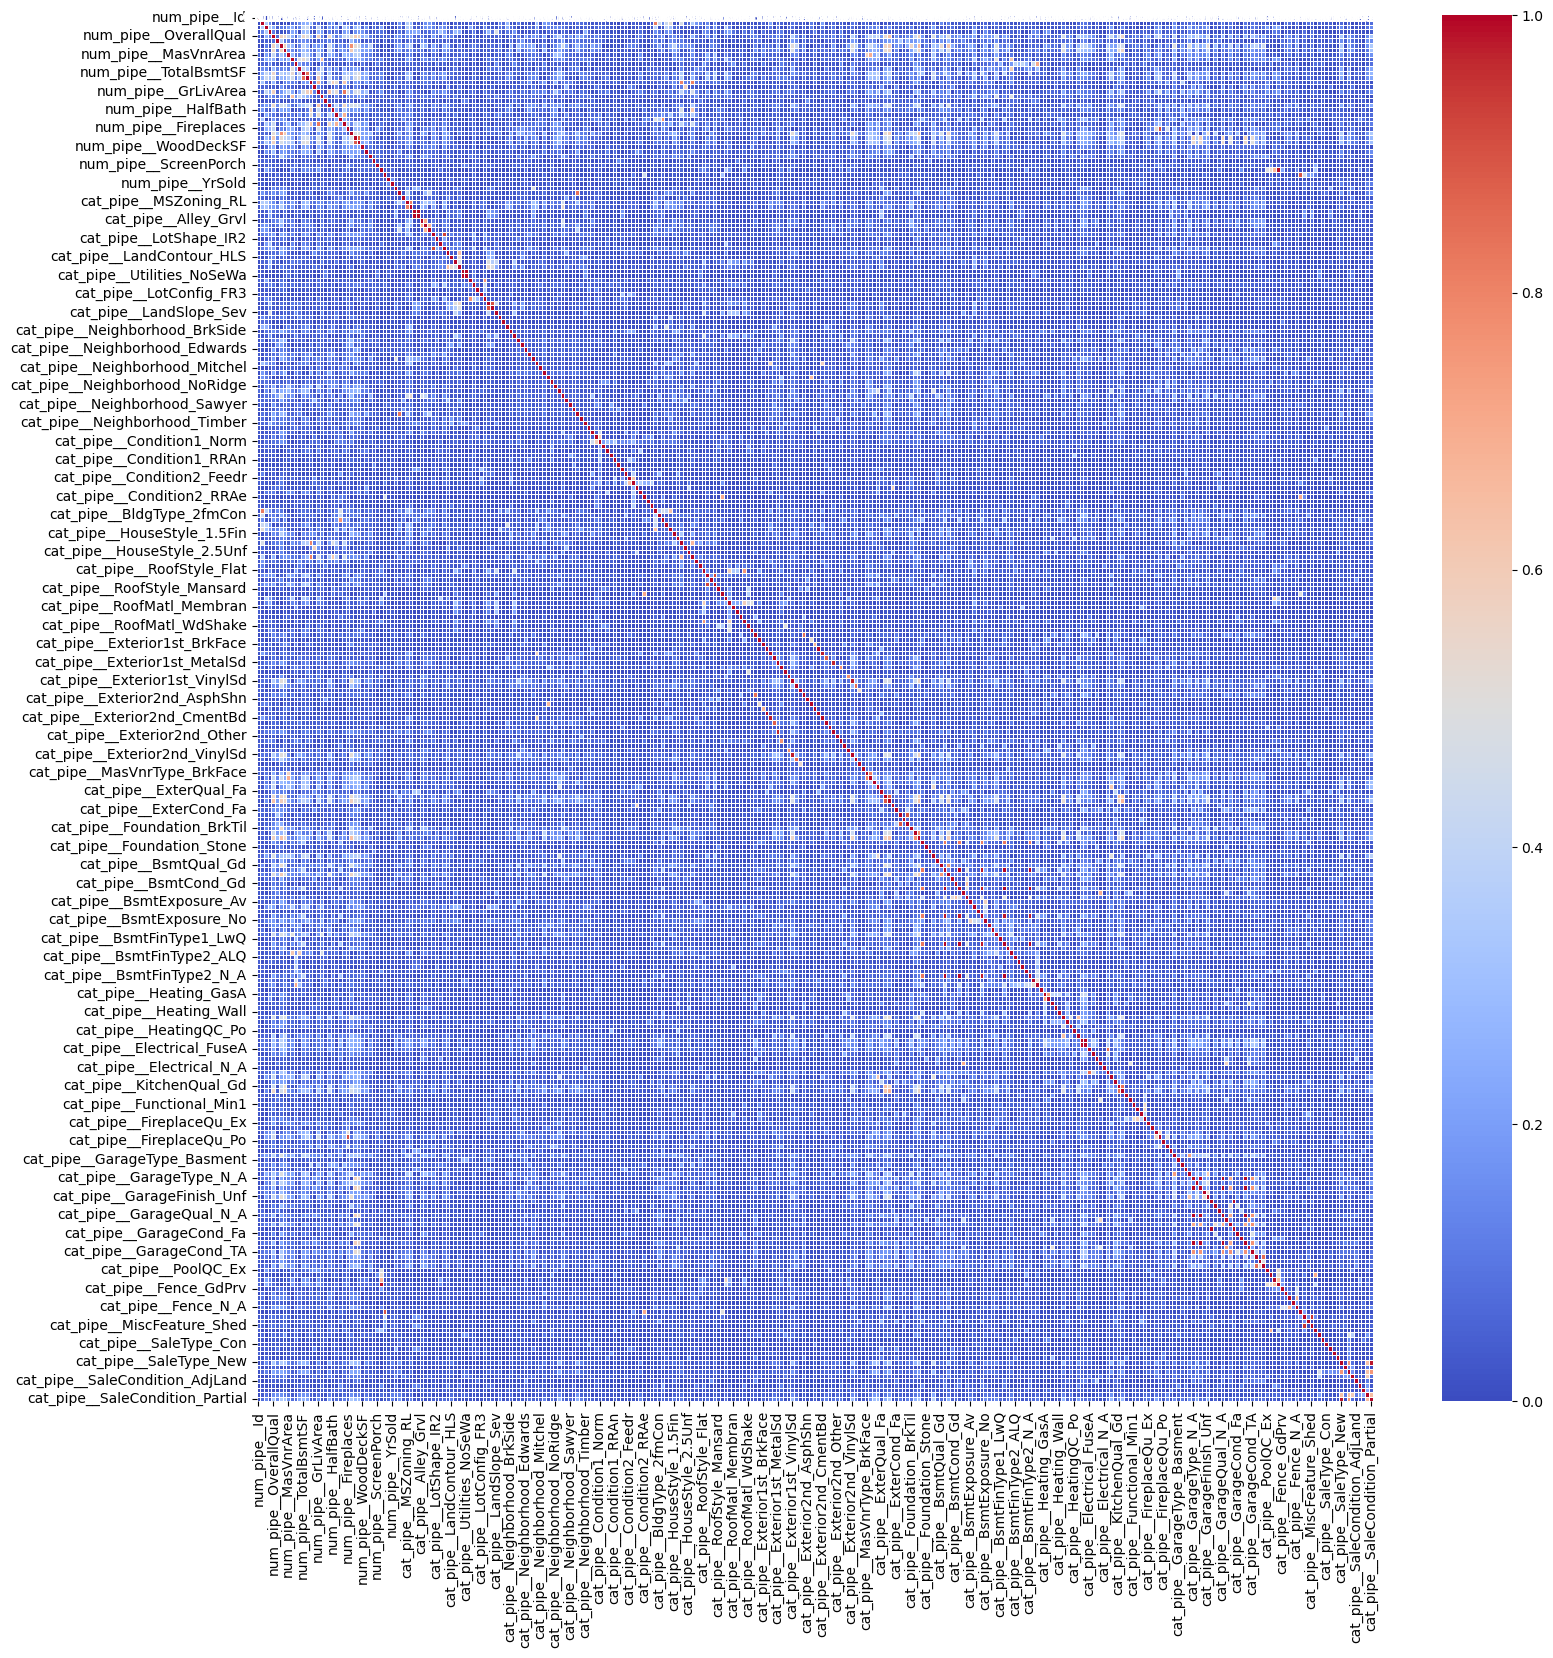

In [75]:
# Calculate the absolute correlation matrix for the feature matrix X_train_var2
corrMatrix = x_train_trans_fit.corr().abs()

# Set the size of the heatmap to be 18x18 inches
plt.figure(figsize=(18, 18))

# Create a heatmap using Seaborn (sns) to visualize the correlation matrix
# 'annot=True' adds the correlation values to the cells for better readability
# 'cmap='coolwarm'' specifies the color map to be used, with warm colors (red) for positive correlations
# and cool colors (blue) for negative correlations
# 'linewidths' sets the width of the white lines around the squares
sns.heatmap(corrMatrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.4);

In [76]:
# Set the correlation threshold to consider columns as highly correlated
correlation_threshold = 0.95

# Initialise an empty list to store the pairs of highly correlated columns
highly_correlated_columns = []

# Get the number of features (columns) in the correlation matrix
num_features = len(corrMatrix.columns)

# Loop through the upper triangle of the correlation matrix to find highly correlated columns
# Note: We start from i+1 to avoid redundancy as correlation_matrix is symmetric
for i in range(num_features):
    for j in range(i + 1, num_features):
        # Check if the correlation value between columns i and j is greater than or equal to the threshold
        if corrMatrix.iloc[i, j] >= correlation_threshold:
            # Append the tuple (column_i, column_j) to the list of highly correlated columns
            highly_correlated_columns.append((corrMatrix.columns[i], corrMatrix.columns[j], f"correlation = {round(corrMatrix.iloc[i, j], 2)}"))

# Print the pairs of highly correlated columns
print("Highly correlated columns:", highly_correlated_columns)

Highly correlated columns: [('num_pipe__PoolArea', 'cat_pipe__PoolQC_N_A', 'correlation = 0.99'), ('cat_pipe__Street_Grvl', 'cat_pipe__Street_Pave', 'correlation = 1.0'), ('cat_pipe__Utilities_AllPub', 'cat_pipe__Utilities_NoSeWa', 'correlation = 1.0'), ('cat_pipe__Exterior1st_CBlock', 'cat_pipe__Exterior2nd_CBlock', 'correlation = 1.0'), ('cat_pipe__Exterior1st_CemntBd', 'cat_pipe__Exterior2nd_CmentBd', 'correlation = 0.98'), ('cat_pipe__Exterior1st_MetalSd', 'cat_pipe__Exterior2nd_MetalSd', 'correlation = 0.97'), ('cat_pipe__Exterior1st_VinylSd', 'cat_pipe__Exterior2nd_VinylSd', 'correlation = 0.98'), ('cat_pipe__BsmtQual_N_A', 'cat_pipe__BsmtCond_N_A', 'correlation = 1.0'), ('cat_pipe__BsmtQual_N_A', 'cat_pipe__BsmtExposure_N_A', 'correlation = 0.98'), ('cat_pipe__BsmtQual_N_A', 'cat_pipe__BsmtFinType1_N_A', 'correlation = 1.0'), ('cat_pipe__BsmtQual_N_A', 'cat_pipe__BsmtFinType2_N_A', 'correlation = 1.0'), ('cat_pipe__BsmtCond_N_A', 'cat_pipe__BsmtExposure_N_A', 'correlation = 0.98

In [77]:
to_drop = [element_a for element_a, element_b, element_c in highly_correlated_columns]
to_drop

['num_pipe__PoolArea',
 'cat_pipe__Street_Grvl',
 'cat_pipe__Utilities_AllPub',
 'cat_pipe__Exterior1st_CBlock',
 'cat_pipe__Exterior1st_CemntBd',
 'cat_pipe__Exterior1st_MetalSd',
 'cat_pipe__Exterior1st_VinylSd',
 'cat_pipe__BsmtQual_N_A',
 'cat_pipe__BsmtQual_N_A',
 'cat_pipe__BsmtQual_N_A',
 'cat_pipe__BsmtQual_N_A',
 'cat_pipe__BsmtCond_N_A',
 'cat_pipe__BsmtCond_N_A',
 'cat_pipe__BsmtCond_N_A',
 'cat_pipe__BsmtExposure_N_A',
 'cat_pipe__BsmtExposure_N_A',
 'cat_pipe__BsmtFinType1_N_A',
 'cat_pipe__CentralAir_N',
 'cat_pipe__GarageType_N_A',
 'cat_pipe__GarageType_N_A',
 'cat_pipe__GarageType_N_A',
 'cat_pipe__GarageFinish_N_A',
 'cat_pipe__GarageFinish_N_A',
 'cat_pipe__GarageQual_Ex',
 'cat_pipe__GarageQual_N_A',
 'cat_pipe__MiscFeature_N_A',
 'cat_pipe__SaleType_New']

In [78]:
# Drop the columns from the train set.
x_train_corr = x_train_trans_fit.drop(columns=to_drop).copy()

# Drop the columns from the test set.
x_test_corr = x_test_trans_fit.drop(columns=to_drop).copy()

In [79]:
# Decision tree.
corr_tree = DecisionTreeRegressor()
corr_tree.fit(x_train_corr, y_train)
corr_tree_pred = corr_tree.predict(x_test_corr)

# K-Nearest Neighbors.
corr_knn = KNeighborsRegressor(n_neighbors=1)
corr_knn.fit(x_train_corr, y_train)
corr_knn_pred = corr_knn.predict(x_test_corr)

# Linear Regresion
corr_linear_reg = LinearRegression()
corr_linear_reg.fit(x_train_corr, y_train)
corr_linear_reg_pred = corr_linear_reg.predict(x_test_corr)

# Random Forest Regression
corr_random_forest_reg = RandomForestRegressor()
corr_random_forest_reg.fit(x_train_corr, y_train)
corr_random_forest_reg_pred = corr_random_forest_reg.predict(x_test_corr)

# SVR 
corr_svr_reg = SVR()
corr_svr_reg.fit(x_train_corr, y_train)
corr_svr_reg_pred = corr_svr_reg.predict(x_test_corr)

# Lasso
corr_lasso_reg = Lasso()
corr_lasso_reg.fit(x_train_corr, y_train)
corr_lasso_reg_pred = corr_lasso_reg.predict(x_test_corr)

# Ridge - For Rridge it is need to change the algorithm a little
x_train_prepro = preprocessor.fit_transform(x_train)
x_test_prepro = preprocessor.transform(x_test)
corr_ridge_reg = Ridge()
corr_ridge_reg.fit(x_train_prepro, y_train)
corr_ridge_reg_pred = corr_ridge_reg.predict(x_test_prepro)

performances.loc["collinearity", "decision_tree"] = r2_score(y_test, corr_tree_pred)
performances.loc["collinearity", "knn"] = r2_score(y_test, corr_knn_pred)
performances.loc["collinearity", "linear_regression"] = r2_score(y_test, corr_linear_reg_pred)
performances.loc["collinearity", "random_forest"] = r2_score(y_test, corr_random_forest_reg_pred)
performances.loc["collinearity", "svr"] = r2_score(y_test, corr_svr_reg_pred)
performances.loc["collinearity", "lasso"] = r2_score(y_test, corr_lasso_reg_pred)
performances.loc["collinearity", "ridge"] = r2_score(y_test, corr_ridge_reg_pred)

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205


## K-Best

In [80]:
#Creating a pipeline 
#Initialize KBest, using the f-regression and setting k=10.
pipeline_kbest = make_pipeline(preprocessor,
                               MinMaxScaler(),
                               SelectKBest(score_func=f_regression, k=10)).set_output(transform='pandas') 

#Use the pipeline created above to fit and transform the train data 
x_train_kbest = pipeline_kbest.fit_transform(x_train, y_train)

#Transform the test set
x_test_kbest = pipeline_kbest.transform(x_test)

In [81]:
#Store the decision tree
tree = DecisionTreeRegressor()
#Fit the decicion tree 
tree.fit(x_train_kbest, y_train)
#Predict the test data 
tree_pred_kbest = tree.predict(X = x_test_kbest)

#Store the K-Nearest Neighbor
neigh = KNeighborsRegressor(n_neighbors=12)
#Fit 
neigh.fit(x_train_kbest, y_train)
#Predict the test data 
knn_pred_kbest = neigh.predict(X = x_test_kbest)

#  Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train_kbest, y_train)
linear_reg_pred = linear_reg.predict(x_test_kbest)

# Random Forest Regression
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(x_train_kbest, y_train)
random_forest_reg_pred = random_forest_reg.predict(x_test_kbest)

# SVR 
svr_reg = SVR()
svr_reg.fit(x_train_kbest, y_train)
svr_reg_pred = svr_reg.predict(x_test_kbest)

# Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train_kbest, y_train)
lasso_reg_pred = lasso_reg.predict(x_test_kbest)

# Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train_kbest, y_train)
ridge_reg_pred = ridge_reg.predict(x_test_kbest)

In [82]:
performances.loc["KBest_10", "decision_tree"]= r2_score(y_test, tree_pred_kbest)
performances.loc["KBest_10", "knn"] = r2_score(y_test, knn_pred_kbest)
performances.loc["KBest_10", "linear_regression"] = r2_score(y_test, linear_reg_pred)
performances.loc["KBest_10", "random_forest"] = r2_score(y_test, random_forest_reg_pred)
performances.loc["KBest_10", "svr"] = r2_score(y_test, svr_reg_pred)
performances.loc["KBest_10", "lasso"] = r2_score(y_test, lasso_reg_pred)
performances.loc["KBest_10", "ridge"] = r2_score(y_test, ridge_reg_pred)

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764


## Recursive Feature Elimination (RFE)

The Recursive Feature Elimination (RFE) technique is a feature selection approach that recursively removes the least important features, building the model with the remaining features. It can be used in a variety of regression models that provide some type of ranking or importance of features.

In general, RFE can be used with the following regression models:

Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression, Decision Trees (and tree-based methods like Random Forest, Gradient Boosting Trees, etc.), Support Vector Regression (SVM with linear kernel).

The applicability of RFE depends on the model's ability to provide a measure of feature importance. Models that do not provide this measurement are not suitable for use with RFE.

It is possible to use RFE with KNN, however, it is important to note that RFE is most commonly associated with models that provide some measure of feature importance.

KNN itself does not directly provide a feature importance measure as its decision is based on the proximity of points in the feature space. However, this does not prevent using RFE with KNN. RFE can be used to select the most important features before feeding them to KNN, which can help reduce dimensionality and improve computational efficiency.

Therefore, it was decided not to apply the RFE in KNN

#### Decision Tree Regressor

In [83]:
# RFE - feature_importances_ is specific to tree-based models such as  
# RandomForestRegressor and DecisionTreeRegressor or Classification

# Creating a pipeline with MinMaxScaler and RFECV for Decision Tree Regressor
pipeline_rfe_tree = make_pipeline(preprocessor,
                               MinMaxScaler(),
                               RFECV(DecisionTreeRegressor()).set_output(transform='pandas'))

# from sklearn.pipeline import Pipeline

# Fit and transform the training data with the pipeline for RFE with Decision Tree
x_train_rfe_tree = pipeline_rfe_tree.fit_transform(x_train, y_train)
x_test_rfe_tree = pipeline_rfe_tree.transform(x_test)

# Initialize models for Decision Tree Regressor
model_decision_tree = DecisionTreeRegressor()

# Fit the models on the transformed training set
model_decision_tree.fit(x_train_rfe_tree, y_train)

# Make predictions on the transformed test set for each model
predictions_decision_tree = model_decision_tree.predict(x_test_rfe_tree)

# Calculate the R-squared score for each model
r2_decision_tree = r2_score(y_test, predictions_decision_tree)

# Update the performances DataFrame for each model
performances.loc["RFE", "decision_tree"] = r2_decision_tree

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764
RFE,0.759915,NaN,NaN,NaN,NaN,NaN,NaN


#### Linear Regression

In [84]:
# Creating a pipeline with MinMaxScaler and RFECV for Linear Regression
pipeline_rfe_linear = make_pipeline(preprocessor,
                                    MinMaxScaler(),
                                    RFECV(LinearRegression()).set_output(transform='pandas'))

# Fit and transform the training data with the pipeline for RFE with Linear Regression
x_train_rfe_linear = pipeline_rfe_linear.fit_transform(x_train, y_train)
x_test_rfe_linear = pipeline_rfe_linear.transform(x_test)

# Initialize Linear Regression model
model_linear_regression = LinearRegression()

# Fit the model on the transformed training set
model_linear_regression.fit(x_train_rfe_linear, y_train)

# Make predictions on the transformed test set for Linear Regression
predictions_linear_regression = model_linear_regression.predict(x_test_rfe_linear)

# Calculate the R-squared score for Linear Regression
r2_linear_regression = r2_score(y_test, predictions_linear_regression)

# Update the performances DataFrame for Linear Regression
performances.loc["RFE", "linear_regression"] = r2_linear_regression

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764
RFE,0.759915,NaN,4.928985e-01,NaN,NaN,NaN,NaN


#### Random Forest

In [85]:
# RFE - feature_importances_ is specific to tree-based models such as  
# RandomForestRegressor and DecisionTreeRegressor or Classification

# Creating a pipeline with MinMaxScaler and RFECV for Random Forest Regressor
pipeline_rfe_forest = make_pipeline(preprocessor,
                               MinMaxScaler(),
                               RFECV(RandomForestRegressor()).set_output(transform='pandas'))

# Fit and transform the training data with the pipeline for RFE with Forest Regressor
x_train_rfe_forest= pipeline_rfe_forest.fit_transform(x_train, y_train)
x_test_rfe_forest = pipeline_rfe_forest.transform(x_test)

# Initialize models for Linear Regression, Random Forest Regression, SVR, and Lasso
model_random_forest = RandomForestRegressor()

# Fit the models on the transformed training set
model_random_forest.fit(x_train_rfe_forest, y_train)

# Make predictions on the transformed test set for each model
predictions_random_forest = model_random_forest.predict(x_test_rfe_forest)

# Calculate the R-squared score for each model
r2_random_forest = r2_score(y_test, predictions_random_forest)

# Update the performances DataFrame for each model
performances.loc["RFE", "random_forest"] = r2_random_forest

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764
RFE,0.759915,NaN,4.928985e-01,0.879592,NaN,NaN,NaN


#### Support Vector Regression (SVR)

In [86]:
# Creating a pipeline with MinMaxScaler and RFECV for Support Vector Regression
pipeline_rfe_svr = make_pipeline(preprocessor,
                                 MinMaxScaler(),
                                 RFECV(SVR(kernel='linear')).set_output(transform='pandas'))

# Fit and transform the training data with the pipeline for RFE with Support Vector Regression
x_train_rfe_svr = pipeline_rfe_svr.fit_transform(x_train, y_train)
x_test_rfe_svr = pipeline_rfe_svr.transform(x_test)

# Initialize Support Vector Regression model
model_svr = SVR(kernel='linear')

# Fit the model on the transformed training set
model_svr.fit(x_train_rfe_svr, y_train)

# Make predictions on the transformed test set for Support Vector Regression
predictions_svr = model_svr.predict(x_test_rfe_svr)

# Calculate the R-squared score for Support Vector Regression
r2_svr = r2_score(y_test, predictions_svr)

# Update the performances DataFrame for Support Vector Regression
performances.loc["RFE", "svr"] = r2_svr
performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764
RFE,0.759915,NaN,4.928985e-01,0.879592,-0.024522,NaN,NaN


#### Lasso

In [87]:
# Creating a pipeline with MinMaxScaler and RFECV for Lasso Regression
pipeline_rfe_lasso = make_pipeline(preprocessor,
                                   MinMaxScaler(),
                                   RFECV(Lasso()).set_output(transform='pandas'))

# Fit and transform the training data with the pipeline for RFE with Lasso Regression
x_train_rfe_lasso = pipeline_rfe_lasso.fit_transform(x_train, y_train)
x_test_rfe_lasso = pipeline_rfe_lasso.transform(x_test)

# Initialize Lasso Regression model
model_lasso_regression = Lasso()

# Fit the model on the transformed training set
model_lasso_regression.fit(x_train_rfe_lasso, y_train)

# Make predictions on the transformed test set for Lasso Regression
predictions_lasso_regression = model_lasso_regression.predict(x_test_rfe_lasso)

# Calculate the R-squared score for Lasso Regression
r2_lasso_regression = r2_score(y_test, predictions_lasso_regression)

# Update the performances DataFrame for Lasso Regression
performances.loc["RFE", "lasso_regression"] = r2_lasso_regression

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge,lasso_regression
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359,NaN
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778,NaN
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205,NaN
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764,NaN
RFE,0.759915,NaN,4.928985e-01,0.879592,-0.024522,NaN,NaN,0.894507


#### Ridge

In [88]:
# Creating a pipeline with MinMaxScaler and RFECV for Ridge Regression
pipeline_rfe_ridge = make_pipeline(preprocessor,
                                   MinMaxScaler(),
                                   RFECV(Ridge()).set_output(transform='pandas'))

# Fit and transform the training data with the pipeline for RFE with Ridge Regression
x_train_rfe_ridge = pipeline_rfe_ridge.fit_transform(x_train, y_train)
x_test_rfe_ridge = pipeline_rfe_ridge.transform(x_test)

# Initialize Ridge Regression model
model_ridge_regression = Ridge()

# Fit the model on the transformed training set
model_ridge_regression.fit(x_train_rfe_ridge, y_train)

# Make predictions on the transformed test set for Ridge Regression
predictions_ridge_regression = model_ridge_regression.predict(x_test_rfe_ridge)

# Calculate the R-squared score for Ridge Regression
r2_ridge_regression = r2_score(y_test, predictions_ridge_regression)

# Update the performances DataFrame for Ridge Regression
performances.loc["RFE", "ridge_regression"] = r2_ridge_regression
performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge,lasso_regression,ridge_regression
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359,NaN,NaN
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778,NaN,NaN
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205,NaN,NaN
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764,NaN,NaN
RFE,0.759915,NaN,4.928985e-01,0.879592,-0.024522,NaN,NaN,0.894507,0.887228


## Select from model 

SelectFromModel is another technique used for feature selection, it works by selecting the most important features based on the scores assigned to them by the provided estimator. This means it can be used with multiple estimators that provide some form of feature importance.

In terms of regression models, it is possible to use SelectFromModel with models that provide feature importance attributes. Some examples of regression models that provide these attributes are:

Linear Regression, Ridge Regression, Lasso Regression, Support Vector Regression (SVM with linear kernel), ElasticNet Regression, Decision Trees (and tree-based methods like Random Forest, Gradient Boosting Trees, etc.)

In general, any regression model that can provide a measure of feature importance can be used with SelectFromModel. However, it is important to note that not all regression models directly provide these measures, and you need to check the specific documentation for the model you are using.

##### As explained in Recursive Feature Elimination (RFE), KNN does not directly provide a measure of feature importance, making it not possible to apply SelectFromModel.

##### The estimated Support Vector Regression (SVR) does not have a feature_importances_ attribute, which is required for the SelectFromModel function. Other feature selection techniques are more suitable for SVM-based models such as RFE (Recursive Feature Elimination) with RFECV (Recursive Feature Elimination with Cross-Validation).

#### Therefore, it was decided not to apply the KNN and SVR estimators in SelectFromModel.

##### The concrete classes that extend SelectFromModel are:

##### `SelectFromModel(estimator, threshold='mean', prefit=False)`

Additionally, there are specific implementations for different types of models:

##### `sklearn.feature_selection.SelectFromModel` for linear models:

- `SelectFromModel(estimator=LinearSVC())`
- `SelectFromModel(estimator=LogisticRegression())`
- `SelectFromModel(estimator=SGDClassifier())`
- `SelectFromModel(estimator=SGDRegressor())`

##### `sklearn.feature_selection.SelectFromModel` for tree-based models:

- `SelectFromModel(estimator=DecisionTreeClassifier())`
- `SelectFromModel(estimator=DecisionTreeRegressor())`
- `SelectFromModel(estimator=RandomForestClassifier())`
- `SelectFromModel(estimator=RandomForestRegressor())`
- `SelectFromModel(estimator=ExtraTreesClassifier())`
- `SelectFromModel(estimator=ExtraTreesRegressor())`
- `SelectFromModel(estimator=GradientBoostingClassifier())`
- `SelectFromModel(estimator=GradientBoostingRegressor())`

These classes allow feature selection based on the importance calculated by the provided estimator. The "threshold" argument specifies the criteria for selecting resources. It can be an absolute numeric value, a string representing a function ("mean", "median", etc.), or "None" to use all features that have non-zero importance. The "profit" argument is a boolean indicating whether the estimator has already been trained outside the SelectFromModel instance.

#### Decision Tree Regressor

In [89]:
# Creating a pipeline to SelectFromModel with Decision Tree Regressor
pipeline_select_model_tree = make_pipeline(preprocessor,
                               MinMaxScaler(),
                               SelectFromModel(estimator=DecisionTreeRegressor(), 
                                               threshold=None).set_output(transform='pandas'))

# Transform the train set
x_train_select_model_tree = pipeline_select_model_tree.fit_transform(x_train, y_train)

# Transform the test data with the pipeline.
x_test_select_model_tree = pipeline_select_model_tree.transform(x_test)

# Show shape of the train and test dataset to check for the number of features kept.
print(x_train_select_model_tree.shape, x_test_select_model_tree.shape)

(1168, 21) (292, 21)


In [90]:
pipeline_select_model_tree.get_feature_names_out()

array(['num_pipe__LotFrontage', 'num_pipe__LotArea',
       'num_pipe__OverallQual', 'num_pipe__OverallCond',
       'num_pipe__YearBuilt', 'num_pipe__YearRemodAdd',
       'num_pipe__BsmtFinSF1', 'num_pipe__BsmtUnfSF',
       'num_pipe__TotalBsmtSF', 'num_pipe__1stFlrSF',
       'num_pipe__2ndFlrSF', 'num_pipe__LowQualFinSF',
       'num_pipe__GrLivArea', 'num_pipe__KitchenAbvGr',
       'num_pipe__GarageYrBlt', 'num_pipe__GarageCars',
       'num_pipe__GarageArea', 'cat_pipe__LandContour_Bnk',
       'cat_pipe__RoofMatl_CompShg', 'cat_pipe__BsmtQual_Ex',
       'cat_pipe__GarageType_Detchd'], dtype=object)

In [91]:
# Decision Tree Model
select_model_tree = DecisionTreeRegressor()
select_model_tree.fit(x_train_select_model_tree, y_train)  # Train on the correct training set
select_model_tree_pred = select_model_tree.predict(x_test_select_model_tree)  # Predict on the test set

# Evaluate and store model performance
performances.loc["model_selected", "decision_tree"] = r2_score(y_test, select_model_tree_pred)
performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge,lasso_regression,ridge_regression
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359,NaN,NaN
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778,NaN,NaN
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205,NaN,NaN
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764,NaN,NaN
RFE,0.759915,NaN,4.928985e-01,0.879592,-0.024522,NaN,NaN,0.894507,0.887228
model_selected,0.730207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Linear Regression

In [92]:
# Creating a pipeline to SelectFromModel with linear regression
pipeline_select_model_linear = make_pipeline(preprocessor,
                               MinMaxScaler(),
                               SelectFromModel(estimator=LinearRegression(), 
                                               threshold=None).set_output(transform='pandas'))

# Transform the train set
x_train_select_model_linear = pipeline_select_model_linear.fit_transform(x_train, y_train)

# Transform the test data with the pipeline.
x_test_select_model_linear = pipeline_select_model_linear.transform(x_test)

# Show shape of the train and test dataset to check for the number of features kept.
print(x_train_select_model_linear.shape, x_test_select_model_linear.shape)

(1168, 99) (292, 99)


In [93]:
pipeline_select_model_linear.get_feature_names_out()

array(['num_pipe__BsmtFinSF1', 'num_pipe__BsmtFinSF2',
       'num_pipe__BsmtUnfSF', 'num_pipe__TotalBsmtSF',
       'num_pipe__1stFlrSF', 'num_pipe__2ndFlrSF', 'num_pipe__GrLivArea',
       'cat_pipe__LotShape_IR1', 'cat_pipe__LotShape_IR2',
       'cat_pipe__LotShape_IR3', 'cat_pipe__LotShape_Reg',
       'cat_pipe__LotConfig_Corner', 'cat_pipe__LotConfig_CulDSac',
       'cat_pipe__LotConfig_FR2', 'cat_pipe__LotConfig_FR3',
       'cat_pipe__LotConfig_Inside', 'cat_pipe__BldgType_1Fam',
       'cat_pipe__BldgType_2fmCon', 'cat_pipe__BldgType_Duplex',
       'cat_pipe__BldgType_Twnhs', 'cat_pipe__BldgType_TwnhsE',
       'cat_pipe__HouseStyle_1.5Fin', 'cat_pipe__HouseStyle_1.5Unf',
       'cat_pipe__HouseStyle_1Story', 'cat_pipe__HouseStyle_2.5Fin',
       'cat_pipe__HouseStyle_2.5Unf', 'cat_pipe__HouseStyle_2Story',
       'cat_pipe__HouseStyle_SFoyer', 'cat_pipe__HouseStyle_SLvl',
       'cat_pipe__Exterior2nd_AsbShng', 'cat_pipe__Exterior2nd_AsphShn',
       'cat_pipe__Exterior2nd

In [94]:
# Linear Regression
select_model_linear = LinearRegression()
select_model_linear.fit(x_train_select_model_linear, y_train)  
select_model_linear_pred = select_model_linear.predict(x_test_select_model_linear)  

# Evaluate and store model performance
performances.loc["model_selected", "linear_regression"] = r2_score(y_test, select_model_linear_pred)
performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge,lasso_regression,ridge_regression
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359,NaN,NaN
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778,NaN,NaN
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205,NaN,NaN
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764,NaN,NaN
RFE,0.759915,NaN,4.928985e-01,0.879592,-0.024522,NaN,NaN,0.894507,0.887228
model_selected,0.730207,NaN,8.160336e-01,NaN,NaN,NaN,NaN,NaN,NaN


#### Random Forest

In [95]:
# Creating a pipeline to SelectFromModel with Random Forest
pipeline_select_model_RF = make_pipeline(preprocessor,
                                          MinMaxScaler(),
                                          SelectFromModel(estimator=RandomForestRegressor(), 
                                                          threshold=None).set_output(transform='pandas')
)

# Transform the train set
x_train_select_model_RF = pipeline_select_model_RF.fit_transform(x_train, y_train)

# Transform the test data with the pipeline.
x_test_select_model_RF = pipeline_select_model_RF.transform(x_test)

# Show shape of the train and test dataset to check for the number of features kept.
print(x_train_select_model_RF.shape, x_test_select_model_RF.shape)

(1168, 21) (292, 21)


In [96]:
pipeline_select_model_RF.get_feature_names_out()

array(['num_pipe__LotFrontage', 'num_pipe__LotArea',
       'num_pipe__OverallQual', 'num_pipe__OverallCond',
       'num_pipe__YearBuilt', 'num_pipe__YearRemodAdd',
       'num_pipe__MasVnrArea', 'num_pipe__BsmtFinSF1',
       'num_pipe__BsmtUnfSF', 'num_pipe__TotalBsmtSF',
       'num_pipe__1stFlrSF', 'num_pipe__2ndFlrSF', 'num_pipe__GrLivArea',
       'num_pipe__FullBath', 'num_pipe__TotRmsAbvGrd',
       'num_pipe__Fireplaces', 'num_pipe__GarageYrBlt',
       'num_pipe__GarageCars', 'num_pipe__GarageArea',
       'num_pipe__WoodDeckSF', 'num_pipe__OpenPorchSF'], dtype=object)

In [97]:
# Random Forest
select_model_RF = RandomForestRegressor()
select_model_RF.fit(x_train_select_model_RF, y_train)  # Train on the correct training set
select_model_RF_pred = select_model_RF.predict(x_test_select_model_RF)  # Predict on the test set

# Evaluate and store model performance
performances.loc["model_selected", "random_florest"] = r2_score(y_test, select_model_RF_pred)

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge,lasso_regression,ridge_regression,random_florest
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359,NaN,NaN,NaN
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778,NaN,NaN,NaN
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205,NaN,NaN,NaN
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764,NaN,NaN,NaN
RFE,0.759915,NaN,4.928985e-01,0.879592,-0.024522,NaN,NaN,0.894507,0.887228,NaN
model_selected,0.730207,NaN,8.160336e-01,NaN,NaN,NaN,NaN,NaN,NaN,0.879783


#### Lasso CV 

In [98]:
# Creating a pipeline to SelectFromModel with Lasso CV 
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# Pipeline para Lasso
pipeline_select_model_lasso = make_pipeline(preprocessor,
                                            MinMaxScaler(),
                                            SelectFromModel(estimator=LassoCV(), 
                                                            threshold=None).set_output(transform='pandas')
)
# Transform the train set
x_train_select_model_lasso = pipeline_select_model_lasso.fit_transform(x_train, y_train)

# Transform the test data with the pipeline.
x_test_select_model_lasso = pipeline_select_model_lasso.transform(x_test)

# Show shape of the train and test dataset to check for the number of features kept.
print(x_train_select_model_lasso.shape, x_test_select_model_lasso.shape)

(1168, 79) (292, 79)


In [99]:
pipeline_select_model_lasso.get_feature_names_out()

array(['num_pipe__MSSubClass', 'num_pipe__OverallQual',
       'num_pipe__OverallCond', 'num_pipe__YearBuilt',
       'num_pipe__YearRemodAdd', 'num_pipe__GrLivArea',
       'num_pipe__BsmtFullBath', 'num_pipe__FullBath',
       'num_pipe__HalfBath', 'num_pipe__TotRmsAbvGrd',
       'num_pipe__Fireplaces', 'num_pipe__GarageCars',
       'num_pipe__WoodDeckSF', 'num_pipe__ScreenPorch',
       'cat_pipe__MSZoning_C (all)', 'cat_pipe__MSZoning_RL',
       'cat_pipe__LotShape_IR2', 'cat_pipe__LotShape_Reg',
       'cat_pipe__LandContour_Bnk', 'cat_pipe__LandContour_HLS',
       'cat_pipe__LotConfig_CulDSac', 'cat_pipe__LotConfig_FR2',
       'cat_pipe__LandSlope_Gtl', 'cat_pipe__Neighborhood_BrkSide',
       'cat_pipe__Neighborhood_Crawfor', 'cat_pipe__Neighborhood_Edwards',
       'cat_pipe__Neighborhood_Gilbert', 'cat_pipe__Neighborhood_Mitchel',
       'cat_pipe__Neighborhood_NAmes', 'cat_pipe__Neighborhood_NoRidge',
       'cat_pipe__Neighborhood_NridgHt', 'cat_pipe__Neighborhood_OldTo

In [100]:
# Lasso
select_model_lasso = LassoCV()
select_model_lasso.fit(x_train_select_model_lasso, y_train)  # Train on the correct training set
select_model_lasso_pred = select_model_lasso.predict(x_test_select_model_lasso)  # Predict on the test set

# Evaluate and store model performance
performances.loc["model_selected", "lasso"] = r2_score(y_test, select_model_lasso_pred)

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge,lasso_regression,ridge_regression,random_florest
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359,NaN,NaN,NaN
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778,NaN,NaN,NaN
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205,NaN,NaN,NaN
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764,NaN,NaN,NaN
RFE,0.759915,NaN,4.928985e-01,0.879592,-0.024522,NaN,NaN,0.894507,0.887228,NaN
model_selected,0.730207,NaN,8.160336e-01,NaN,NaN,0.893895,NaN,NaN,NaN,0.879783


#### Ridge regression

In [101]:
# Creating a pipeline to SelectFromModel with Ridge Regression
pipeline_select_ridge = make_pipeline(preprocessor,
                                      MinMaxScaler(),
                                      SelectFromModel(estimator=Ridge(), 
                                                      threshold=None).set_output(transform='pandas'))
# Transform the train set
x_train_select_ridge = pipeline_select_ridge.fit_transform(x_train, y_train)

# Transform the test data with the pipeline
x_test_select_ridge = pipeline_select_ridge.transform(x_test)

# Show the shape of the train and test dataset to check for the number of features kept
print(x_train_select_ridge.shape, x_test_select_ridge.shape)

(1168, 89) (292, 89)


In [102]:
pipeline_select_ridge.get_feature_names_out()

array(['num_pipe__MSSubClass', 'num_pipe__LotFrontage',
       'num_pipe__LotArea', 'num_pipe__OverallQual',
       'num_pipe__OverallCond', 'num_pipe__YearBuilt',
       'num_pipe__MasVnrArea', 'num_pipe__BsmtFinSF1',
       'num_pipe__BsmtFinSF2', 'num_pipe__TotalBsmtSF',
       'num_pipe__1stFlrSF', 'num_pipe__2ndFlrSF',
       'num_pipe__LowQualFinSF', 'num_pipe__GrLivArea',
       'num_pipe__BsmtFullBath', 'num_pipe__FullBath',
       'num_pipe__BedroomAbvGr', 'num_pipe__KitchenAbvGr',
       'num_pipe__TotRmsAbvGrd', 'num_pipe__Fireplaces',
       'num_pipe__GarageCars', 'num_pipe__WoodDeckSF',
       'num_pipe__3SsnPorch', 'num_pipe__ScreenPorch',
       'num_pipe__PoolArea', 'cat_pipe__MSZoning_C (all)',
       'cat_pipe__MSZoning_FV', 'cat_pipe__Street_Grvl',
       'cat_pipe__Street_Pave', 'cat_pipe__LandContour_HLS',
       'cat_pipe__Utilities_AllPub', 'cat_pipe__Utilities_NoSeWa',
       'cat_pipe__LotConfig_CulDSac', 'cat_pipe__Neighborhood_ClearCr',
       'cat_pipe__Nei

In [103]:
# Ridge
select_model_ridge = Ridge()
select_model_ridge.fit(x_train_select_ridge, y_train)  # Train on the correct training set
select_model_ridge_pred = select_model_ridge.predict(x_test_select_ridge)  # Predict on the test set

# Evaluate and store model performance
performances.loc["model_selected", "ridge"] = r2_score(y_test, select_model_ridge_pred)

performances

,decision_tree,knn,linear_regression,random_forest,svr,lasso,ridge,lasso_regression,ridge_regression,random_florest
transformed_MaxMin,0.729664,0.638830,-1.579505e+19,0.889909,-0.062412,0.899621,0.891359,NaN,NaN,NaN
varThreshold_002,0.696532,0.683704,-5.259062e+18,0.875758,-0.062406,0.881609,0.880778,NaN,NaN,NaN
collinearity,0.771974,0.648733,-4.769299e+19,0.876029,-0.062382,0.897529,0.892205,NaN,NaN,NaN
KBest_10,0.772560,0.827415,8.261433e-01,0.869687,-0.060362,0.826168,0.821764,NaN,NaN,NaN
RFE,0.759915,NaN,4.928985e-01,0.879592,-0.024522,NaN,NaN,0.894507,0.887228,NaN
model_selected,0.730207,NaN,8.160336e-01,NaN,NaN,0.893895,0.895826,NaN,NaN,0.879783


#### JUST PLAYING - Scaling the data 

In [104]:
# Initialize the scaler.
my_scaler = MinMaxScaler()

# Create a pipeline that applies the preprocessor and then scales the data
pipeline = make_pipeline(preprocessor, my_scaler)

# Fit the pipeline to x_train and transform the values.
pipeline.fit(x_train)

# Transform both training and testing data
x_train_scaled = pipeline.fit_transform(x_train)
x_test_scaled = pipeline.transform(x_test)

# Calculating the range and variance of scaled features
scaled_df = pd.DataFrame({
    'Range': x_train_scaled.max(axis=0) - x_train_scaled.min(axis=0),
    'Variance': x_train_scaled.var(axis=0)
})

# Sort the DataFrame by variance
sorted_scaled_df = scaled_df.sort_values(by='Variance')
sorted_scaled_df

,Range,Variance
174,1.0,0.000855
151,1.0,0.000855
137,1.0,0.000855
104,1.0,0.000855
211,1.0,0.000855
...,...,...
186,1.0,0.247091
243,1.0,0.249384
217,1.0,0.249876
233,1.0,0.249953


#### Variance Threshold - other way, to see all lines

In [105]:
# Select only numeric columns
numeric_columns = x_train.select_dtypes(include=np.number)

# Calculate range and variance of numeric features in the training data
range_var_df = pd.DataFrame({
    'Range': numeric_columns.max() - numeric_columns.min(),
    'Variance': numeric_columns.var()
}).sort_values(by='Variance')

range_var_df

,Range,Variance
KitchenAbvGr,1.0,4.723210e-02
BsmtHalfBath,2.0,5.048655e-02
HalfBath,2.0,2.525590e-01
BsmtFullBath,3.0,2.737958e-01
FullBath,3.0,3.036698e-01
Fireplaces,3.0,4.053531e-01
GarageCars,4.0,5.564665e-01
BedroomAbvGr,8.0,6.912907e-01
OverallCond,8.0,1.276587e+00
YrSold,4.0,1.776942e+00
